In [1]:
# Code to mount your Google Drive
# Click the play button, then click the link, copy the password and paste it
# in the box area.Sign in with your gmail account.
from google.colab import drive 
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# Set as current directory "gdrive/My Drive/AGH/CMOS/DAC" path
# For this to work the csv files must be uploaded in the signed drive account
# in the path AGH/CMOS/DAC. If there are uploaded in another path, the last line
# of this box should be changed appropriately.

import os
import pandas as pd

%cd /content/gdrive/My\ Drive/
os.chdir('AGH/CMOS/DAC')

/content/gdrive/My Drive


In [4]:
# Calculations for power specifications
max_I = [0]*5
k = 0

for i in range(1,6): 
  df = pd.read_csv("I%i.csv" %i ,sep=';', names = ['time', 'current', 'NA'])

  data = df.values
  df = df.drop(['time', 'NA'], axis=1)
  
  # Delete first row and first 29 wrong numbers because of the power on of the circuit
  for i in range(30):
     df = df.drop([i])
  test = list(df['current'])
  

  for j in range(0, len(test)): 
      test[j] = float(test[j]) 

  max_I[k] = max(test)
  k += 1

print("Power consuption of the DAC is: %f mW < 2 mW" % sum(max_I*5*1000))   

Power consuption of the DAC is: 1.996274 mW < 2 mW


In [7]:
# Calcuations for Vout 
v_df = pd.read_csv("Vout.csv", sep = ';', names = ['time', 'V', 'NA'] ) 

# Delete first row and first 29 wrong numbers because of the power on of the circuit
for i in range(30):
  v_df = v_df.drop([i])

# Convert to lists the useful columns from the dataframe
v_df = v_df.drop(['NA'], axis=1)
time = list(v_df['time'])
vout = list(v_df['V'])

# Convert the string lists to float lists
for i in range(len(time)):
  time[i] = float(time[i])
  vout[i] = float(vout[i])


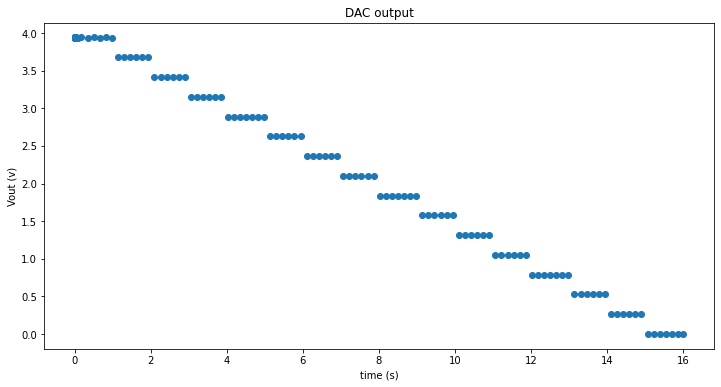

In [9]:
# Visualise DAC Voltage output
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(time,vout)
plt.ylabel('Vout (v)')
plt.xlabel('time (s)')
plt.title('DAC output')
plt.show()


Max DNL error is: 0.059720.
DNL - 1 LSB = -0.190280 < 0.250000 = 1 LSB.


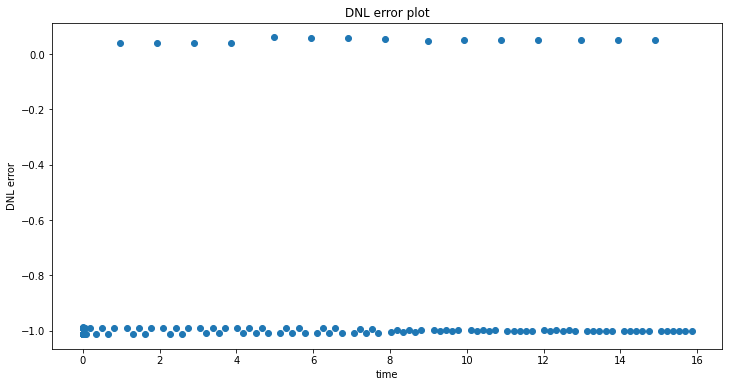

In [14]:
n = 4                         # resolution
Full_Scale_code = 2**n - 1    
Vref = 4                      # Output voltage refernence
LSB = Vref/2**n

DNL = [0] * (len(vout)-1)
for i in range(len(vout)-1):
  DNL[i] = (vout[i] - vout[i+1])/LSB - 1 

# If the DNL of a DAC is bigger than 1, the transfer function of the DAC 
# becomes non-monotonic. A non-monotonic DAC is especially not desired in 
# closed-loop control application as it may cause stability problems, i.e. it 
# may cause oscillations.
# Unlike ADC DNL, for a DAC DNL can be <-1LSB

print("Max DNL error is: %f." % (max(DNL)) ) 
print("DNL - 1 LSB = %f < %f = 1 LSB." % (((max(DNL)-LSB)), LSB))


time_for_DNL = time[0:(len(time)-1)]
plt.figure(figsize=(12,6))
plt.scatter(time_for_DNL,DNL)
plt.ylabel('DNL error')
plt.xlabel('time')
plt.title('DNL error plot')
plt.show()

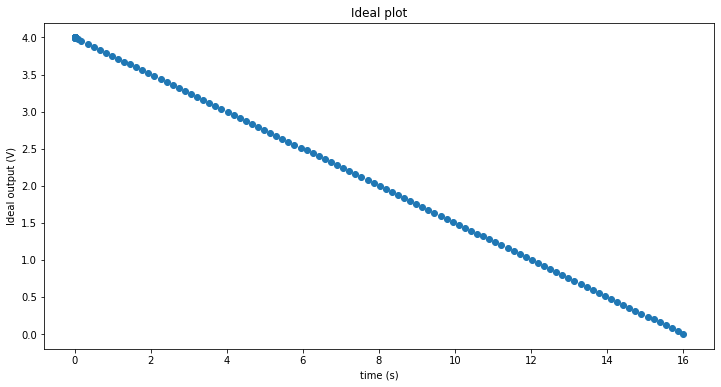

In [15]:
# Ideal function 

ideal = [0]*len(time)
for i in range(len(ideal)):
  ideal[i] = 4 - (time[i]/4)

plt.figure(figsize=(12,6))
plt.scatter(time,ideal)
plt.ylabel('Ideal output (V)')
plt.xlabel('time (s)')
plt.title('Ideal plot')
plt.show()

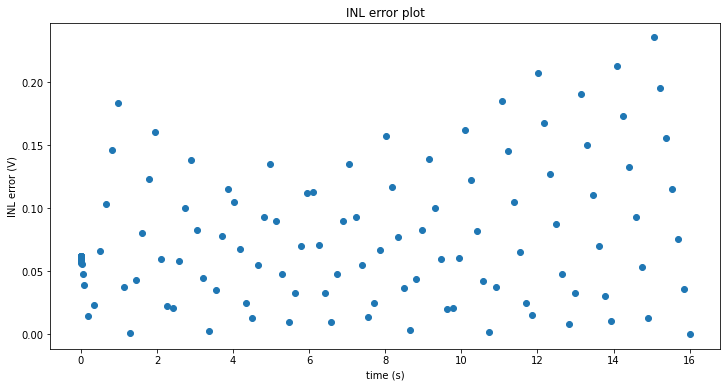

In [16]:
# INL error plots 

INL = [0] * (len(vout))
for i in range(len(vout)):
  INL[i] = abs( (vout[i] - ideal[i]) )  

plt.figure(figsize=(12,6))
plt.scatter(time,INL)
plt.ylabel('INL error (V)')
plt.xlabel('time (s)')
plt.title('INL error plot')
plt.show()

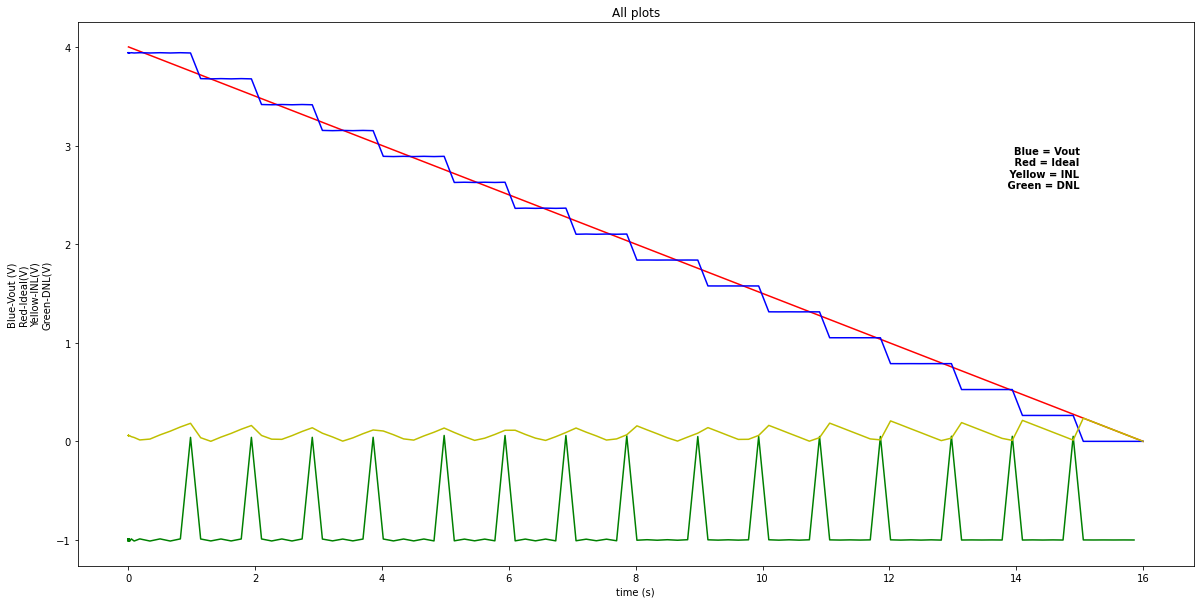

In [17]:
plt.figure(figsize=(20,10))
text = ("Blue = Vout\n Red = Ideal\n Yellow = INL\n Green = DNL")
plt.text( 15, 3, text, horizontalalignment='right',
           verticalalignment='top', weight='bold')
plt.plot(time, ideal, 'r-', time,vout, 'b-', time_for_DNL, DNL, 'g-', time, INL, 'y-')

plt.ylabel('Blue-Vout (V)\nRed-Ideal(V)\nYellow-INL(V)\nGreen-DNL(V)')
plt.xlabel('time (s)')
plt.title('All plots')
plt.show()